## Task-1 : Exploratory Data Analysis

# Import the necessary libraries and datasets

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [20]:
customers = pd.read_csv('data/Customers.csv')
products = pd.read_csv('data/Products.csv')
transactions = pd.read_csv('data/Transactions.csv')

# Preliminary analysis

In [21]:
print("Customers Data:")
print(customers.head())

Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [22]:
print("Products Data:")
print(products.head())

Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [23]:
print("Transactions Data:")
print(transactions.head())

Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [24]:
print("\nMissing Values in Customers:")
print(customers.isnull().sum())
print("\nMissing Values in Products:")
print(products.isnull().sum())
print("\nMissing Values in Transactions:")
print(transactions.isnull().sum())



Missing Values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


There are no NULL values in the datasets. So we can proceed with the analysis.

In [25]:
print("\nSummary Statistics for Customers:")
print(customers.describe())
print("\nSummary Statistics for Products:")
print(products.describe())
print("\nSummary Statistics for Transactions:")
print(transactions.describe())


Summary Statistics for Customers:
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2022-04-16
freq            1                 1             59           3

Summary Statistics for Products:
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000

Summary Statistics for Transactions:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


In [26]:
print(customers.dtypes)
print("-"*50)
print(products.dtypes)
print("-"*50)
print(transactions.dtypes)

CustomerID      object
CustomerName    object
Region          object
SignupDate      object
dtype: object
--------------------------------------------------
ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object
--------------------------------------------------
TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price              float64
dtype: object


In [27]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


In [28]:
customers.dtypes

CustomerID      object
CustomerName    object
Region          object
SignupDate      object
dtype: object

Insight 1: The Majority of the customers are from the South America region region comprising of 29.5% of the userbase.

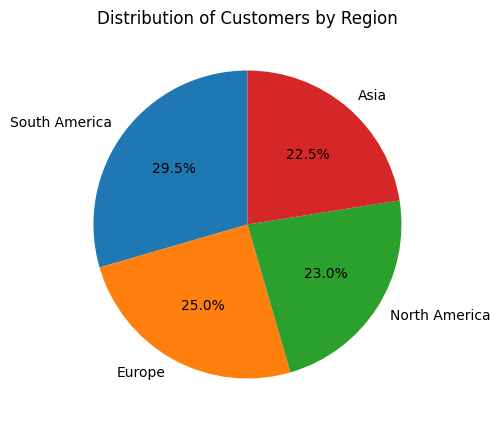

In [29]:
customers['Region'].value_counts().plot(kind='pie', figsize=(10, 5), 
                                         labels=customers['Region'].value_counts().index,
                                         autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Customers by Region')
plt.ylabel('') 
plt.show()

Insight 2: The majority of the transactions are in the month of January. The least number of transactions are in the month of November.

Insight 3: The average price spent in a month is greatest in the month of April with an average amount of $290.46 and least in the month of March with an average price of $224.60.

In [30]:
transactions['Month'] = transactions['TransactionDate'].dt.month

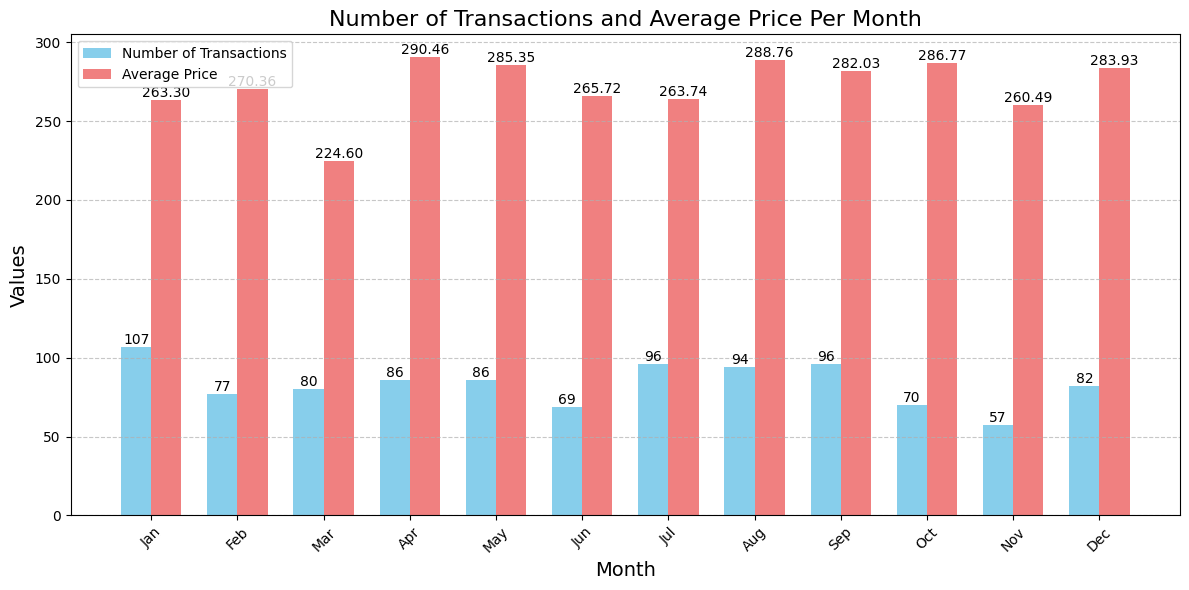

In [31]:
monthly_transactions = transactions['Month'].value_counts().sort_index()
monthly_avg_price = transactions.groupby('Month')['Price'].mean().sort_index()

plt.figure(figsize=(12, 6))

bar_width = 0.35
index = range(12)

bar1 = plt.bar(index, monthly_transactions, bar_width, label='Number of Transactions', color='skyblue')

bar2 = plt.bar([i + bar_width for i in index], monthly_avg_price, bar_width, label='Average Price', color='lightcoral')

for bar in bar1:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}', 
             ha='center', va='bottom', fontsize=10)

for bar in bar2:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', 
             ha='center', va='bottom', fontsize=10)

plt.title('Number of Transactions and Average Price Per Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks([i + bar_width / 2 for i in index], [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
], rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

Insight 4: Most of the revenue is in the Books category, followed by Electronics, Clothing and Home Decor

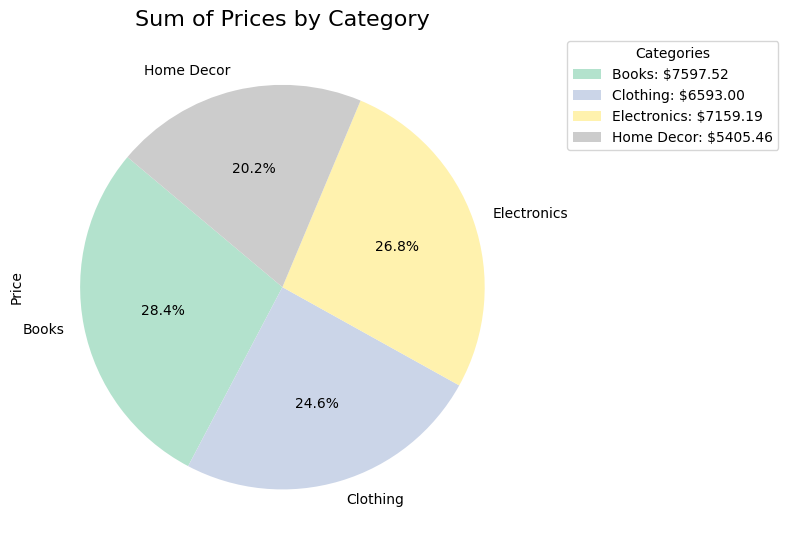

In [32]:
category_price_sum = products.groupby('Category')['Price'].sum()

plt.figure(figsize=(8, 8))
category_price_sum.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='Pastel2')

plt.title('Sum of Prices by Category', fontsize=16)

legend_labels = [f"{category}: ${price:.2f}" for category, price in category_price_sum.items()]
plt.legend(legend_labels, title="Categories", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Insight 5: The most common first name is 'Michael' with a count of 5

In [33]:
first_name_counts=customers['CustomerName'].str.split().str[0].value_counts()

# Find the most common first name and its count
most_common_name = first_name_counts.idxmax()
most_common_count = first_name_counts.max()

print(f"The most common first name is '{most_common_name}' with a count of {most_common_count}.")

The most common first name is 'Michael' with a count of 5.


Insight 6: The company with the most products is 'ActiveWear' with 23 products, followed by 'SoundWave' with 22 products. Together that make 45% of all the products

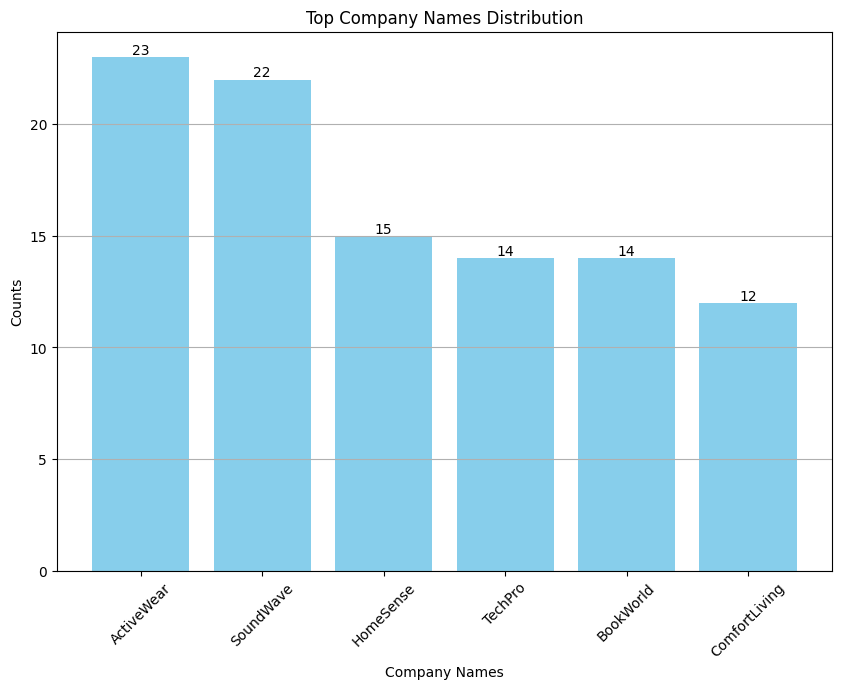

In [40]:
product_name_counts=products['ProductName'].str.split().str[0].value_counts()
top_product_names = product_name_counts

plt.figure(figsize=(10, 7))
bars = plt.bar(product_name_counts.index, top_product_names, color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.title('Top Company Names Distribution')
plt.xlabel('Company Names')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.grid(axis='y')  # Add grid lines for better readability
plt.show()